In [1]:
%pylab notebook
import numpy as np 
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd
# %matplotlib ipympl

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys

sys.path.append('/home/qyli/clu_finder/CLAUDS_HSC/prod_catalogue_iband')
import check_redz
import imp
imp.reload(check_redz)

<module 'check_redz' from '/home/qyli/clu_finder/CLAUDS_HSC/prod_catlg_iband1/check_redz.py'>

In [3]:
COSMOS = fits.open('../CLAUDS_HSC_Photoz/COSMOS_v2_v200930.fits')
DEEP = fits.open('../CLAUDS_HSC_Photoz/DEEP_2_v2_v200930.fits')
ELAIS = fits.open('../CLAUDS_HSC_Photoz/ELAIS_v2_v200930.fits')
XMMLSS = fits.open('../CLAUDS_HSC_Photoz/XMM_LSS_v2_v200930.fits')

In [18]:
COSMOS[1].data['ID'][:], DEEP[1].data['ID'][:], ELAIS[1].data['ID'][:], XMMLSS[1].data['ID'][:]

(array([      0,       1,       2, ..., 4695982, 4695983, 4695984]),
 array([      0,       1,       2, ..., 3229115, 3229116, 3229117]),
 array([      0,       1,       2, ..., 3567886, 3567887, 3567888]),
 array([      0,       1,       2, ..., 3296210, 3296211, 3296212]))

In [13]:
cosmos_mask = COSMOS[1].data['MASK']
deep_mask = DEEP[1].data['MASK']
elais_mask = ELAIS[1].data['MASK']
xmmlss_mask = XMMLSS[1].data['MASK']

cosmos_id = COSMOS[1].data['ID'] + 100000000
deep_id = DEEP[1].data['ID'] + 200000000
elais_id = ELAIS[1].data['ID'] + 300000000
xmmlss_id = XMMLSS[1].data['ID'] + 400000000

cosmos_obj = COSMOS[1].data['OBJ_TYPE']
deep_obj = DEEP[1].data['OBJ_TYPE']
elais_obj = ELAIS[1].data['OBJ_TYPE']
xmmlss_obj = XMMLSS[1].data['OBJ_TYPE']

cosmos_phoz0 = COSMOS[1].data['Z_BEST']
deep_phoz0 = DEEP[1].data['Z_BEST']
elais_phoz0 = ELAIS[1].data['Z_BEST']
xmmlss_phoz0 = XMMLSS[1].data['Z_BEST']

cosmos_magy0 = COSMOS[1].data['y']
deep_magy0 = DEEP[1].data['y']
elais_magy0 = ELAIS[1].data['y']
xmmlss_magy0 = XMMLSS[1].data['y']

cosmos_magg0 = COSMOS[1].data['g']
deep_magg0 = DEEP[1].data['g']
elais_magg0 = ELAIS[1].data['g']
xmmlss_magg0 = XMMLSS[1].data['g']

cosmos_magr0 = COSMOS[1].data['r']
deep_magr0 = DEEP[1].data['r']
elais_magr0 = ELAIS[1].data['r']
xmmlss_magr0 = XMMLSS[1].data['r']

cosmos_magi0 = COSMOS[1].data['i']
deep_magi0 = DEEP[1].data['i']
elais_magi0 = ELAIS[1].data['i']
xmmlss_magi0 = XMMLSS[1].data['i']

cosmos_magz0 = COSMOS[1].data['z']
deep_magz0 = DEEP[1].data['z']
elais_magz0 = ELAIS[1].data['z']
xmmlss_magz0 = XMMLSS[1].data['z']

cosmos_magierr = COSMOS[1].data['i_err']
deep_magierr = DEEP[1].data['i_err']
elais_magierr = ELAIS[1].data['i_err']
xmmlss_magierr = XMMLSS[1].data['i_err']

elais_ra0 = ELAIS[1].data['RA']
xmmlss_ra0 = XMMLSS[1].data['RA']
elais_dec0 = ELAIS[1].data['DEC']
xmmlss_dec0 = XMMLSS[1].data['DEC']

In [5]:
print(cosmos_obj.shape[0]+deep_obj.shape[0]+elais_obj.shape[0]+xmmlss_obj.shape[0])

cosmos_ra = COSMOS[1].data['RA']
deep_ra = DEEP[1].data['RA']
elais_ra = ELAIS[1].data['RA']
xmmlss_ra = XMMLSS[1].data['RA']
ra = np.hstack((cosmos_ra, deep_ra, elais_ra, xmmlss_ra))
print(ra.shape)

cosmos_dec = COSMOS[1].data['DEC']
deep_dec = DEEP[1].data['DEC']
elais_dec = ELAIS[1].data['DEC']
xmmlss_dec = XMMLSS[1].data['DEC']
dec = np.hstack((cosmos_dec, deep_dec, elais_dec, xmmlss_dec))

check_redz.cal_galarea(ra,dec)

14789205
(14789205,)
the cover of galaxy region is 34.40776096285623 dge2


34.40776096285623

In [12]:
cosmos_0 = np.where((cosmos_mask == 0) & (cosmos_obj == 0) & (cosmos_phoz0 > 0)
                   & (cosmos_magg0 > 0) & (cosmos_magr0 > 0) & (cosmos_magi0 > 0) & (cosmos_magz0 > 0) & (cosmos_magy0 > 0) 
                    & (cosmos_magierr < 1) & (cosmos_magi0 < 26))[0]
deep_0 = np.where((deep_mask == 0) & (deep_obj == 0) & (deep_phoz0 > 0) 
                  & (deep_magg0 > 0) & (deep_magr0 > 0) & (deep_magi0 > 0) & (deep_magz0 > 0) & (deep_magy0 > 0) 
                 & (deep_magierr < 1) & (deep_magi0 < 26))[0]
elais_0 = np.where((elais_mask == 0) & (elais_obj == 0) & (elais_phoz0 > 0) 
                  & (elais_magg0 > 0) & (elais_magr0 > 0) & (elais_magi0 > 0) & (elais_magz0 > 0) & (elais_magy0 > 0) 
                  & (elais_magierr < 1) & (elais_magi0 < 26)
                  & ((elais_ra0 < 244.2) | (elais_ra0 > 244.4) | (elais_dec0 < 54.0) | (elais_dec0 > 54.2)))[0]
xmmlss_0 = np.where((xmmlss_mask == 0) & (xmmlss_obj == 0) & (xmmlss_phoz0 > 0) 
                   & (xmmlss_magg0 > 0) & (xmmlss_magr0 > 0) & (xmmlss_magi0 > 0) & (xmmlss_magz0 > 0) & (xmmlss_magy0 > 0) 
                   & (xmmlss_magierr < 1) & (xmmlss_magi0 < 26)
                   & ((xmmlss_ra0 < 37.1) | (xmmlss_ra0 > 37.3) | (xmmlss_dec0 < -5.3) | (xmmlss_dec0 > -5.1)))[0]

In [14]:
cosmos_ra = COSMOS[1].data['RA'][cosmos_0]
deep_ra = DEEP[1].data['RA'][deep_0]
elais_ra = ELAIS[1].data['RA'][elais_0]
xmmlss_ra = XMMLSS[1].data['RA'][xmmlss_0]
ra = np.hstack((cosmos_ra, deep_ra, elais_ra, xmmlss_ra))
print(ra.shape)

cosmos_dec = COSMOS[1].data['DEC'][cosmos_0]
deep_dec = DEEP[1].data['DEC'][deep_0]
elais_dec = ELAIS[1].data['DEC'][elais_0]
xmmlss_dec = XMMLSS[1].data['DEC'][xmmlss_0]
dec = np.hstack((cosmos_dec, deep_dec, elais_dec, xmmlss_dec))

(7752546,)


In [15]:
cosmos_phoz = COSMOS[1].data['Z_BEST'][cosmos_0]
deep_phoz = DEEP[1].data['Z_BEST'][deep_0]
elais_phoz = ELAIS[1].data['Z_BEST'][elais_0]
xmmlss_phoz = XMMLSS[1].data['Z_BEST'][xmmlss_0]
phoz = np.hstack((cosmos_phoz, deep_phoz, elais_phoz, xmmlss_phoz))

cosmos_spez = COSMOS[1].data['Z_SPEC'][cosmos_0]
deep_spez = DEEP[1].data['Z_SPEC'][deep_0]
elais_spez = ELAIS[1].data['Z_SPEC'][elais_0]
xmmlss_spez = XMMLSS[1].data['Z_SPEC'][xmmlss_0]
spez = np.hstack((cosmos_spez, deep_spez, elais_spez, xmmlss_spez))

In [16]:
idxspez = np.where((spez > 0))[0]
print(idxspez.shape)
xx, rate_sca = check_redz.plot_evalz_phoz(spez[idxspez], phoz[idxspez], 6, 20)

from scipy.interpolate import interp1d
f_zerr = interp1d(xx, rate_sca, kind= 'quadratic', fill_value = 'extrapolate')
xz = np.linspace(0.,6.0,100)
plt.plot(xz, f_zerr(xz), 'r-', label = 'spline interpolator')
plt.legend(loc='best')

(65135,)
The selected object number at photometry z < 6 is 65135
[0.15 0.45 0.75 1.05 1.35 1.65 1.95 2.25 2.55 2.85 3.15 3.45 3.75 4.05
 4.35 4.65 4.95 5.25 5.55 5.85]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


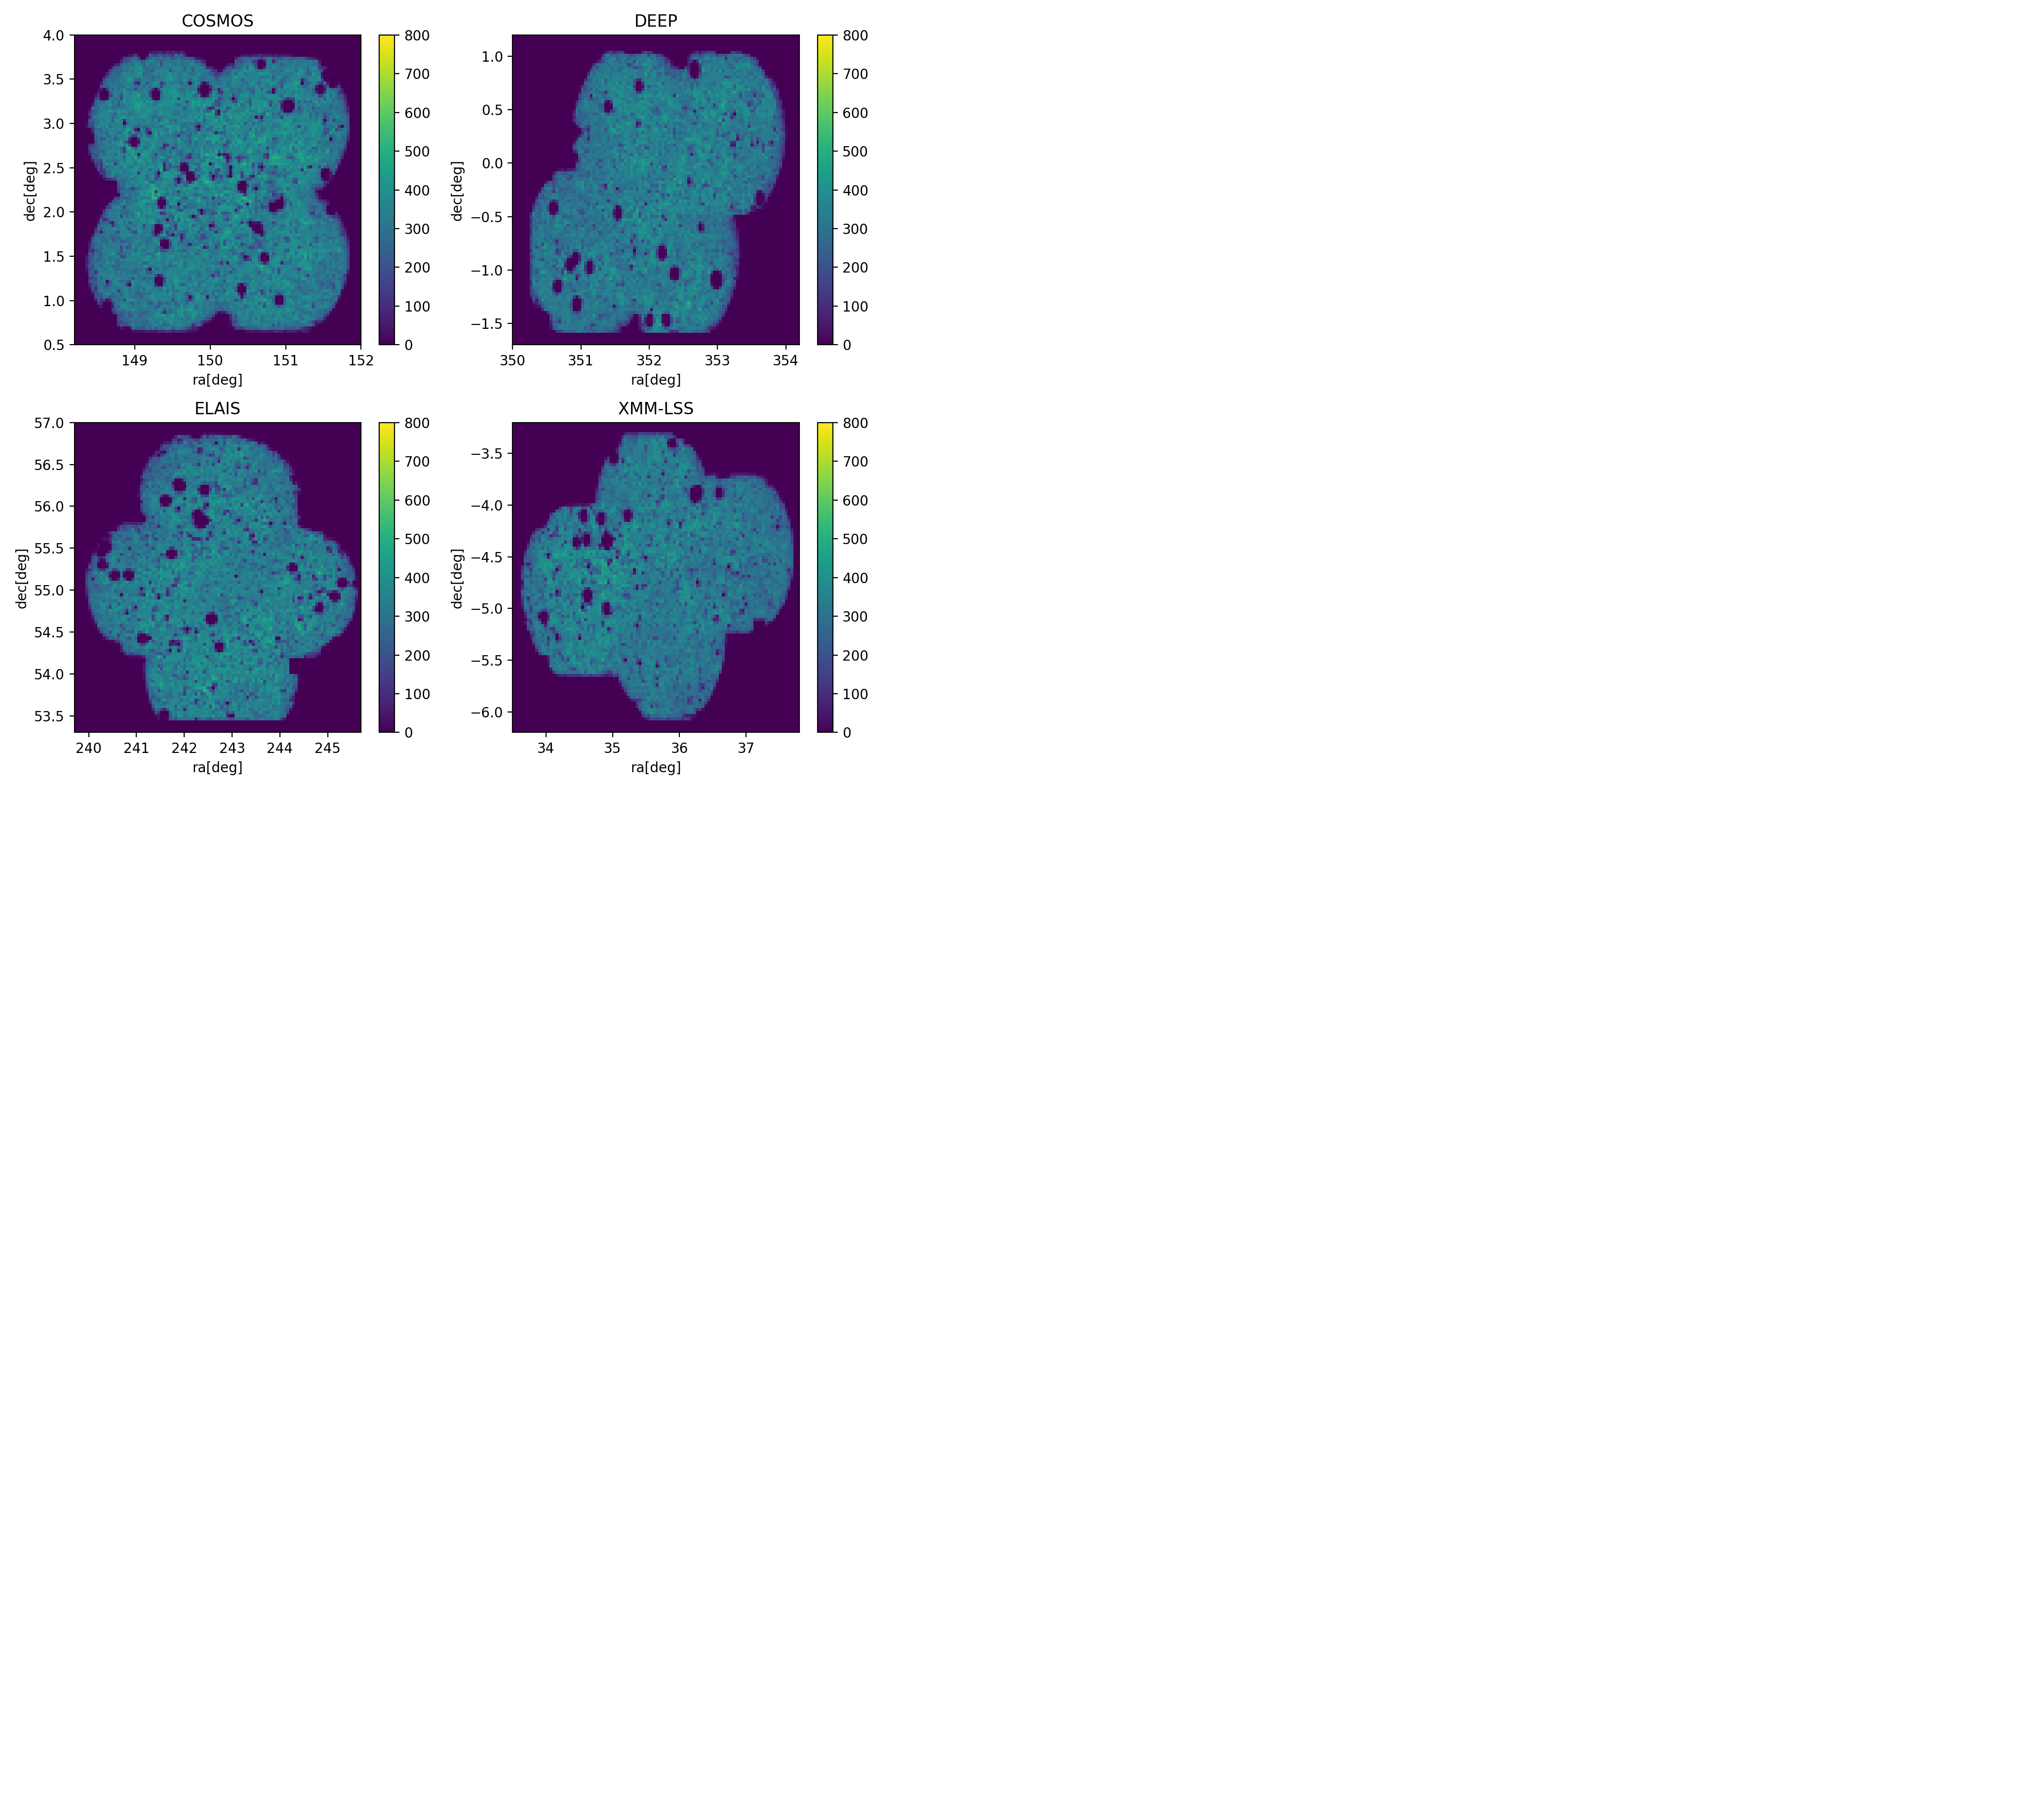

In [10]:
plt.figure(figsize = (9,8))

plt.subplot(221)
h = plt.hist2d(cosmos_ra, cosmos_dec,bins = 100, range = ((148.2,152),(0.5,4)), 
           vmin = 0, vmax = 800)
plt.colorbar()
plt.title('COSMOS')
plt.xlabel('ra[deg]')
plt.ylabel('dec[deg]')

plt.subplot(222)
h = plt.hist2d(deep_ra, deep_dec, bins = 100,range = ((350,354.2),(-1.7,1.2)),
          vmin = 0, vmax = 800)
plt.colorbar()
plt.title('DEEP')
plt.xlabel('ra[deg]')
plt.ylabel('dec[deg]')

plt.subplot(223)
h = plt.hist2d(elais_ra, elais_dec, bins = 100, range = ((239.7,245.7),(53.3,57)),
          vmin = 0, vmax = 800)
plt.colorbar()
plt.title('ELAIS')
plt.xlabel('ra[deg]')
plt.ylabel('dec[deg]')

plt.subplot(224)
h = plt.hist2d(xmmlss_ra, xmmlss_dec, bins = 100, range = ((33.5,37.8),(-6.2,-3.2)),
          vmin = 0, vmax = 800)
plt.colorbar()
plt.title('XMM-LSS')
plt.xlabel('ra[deg]')
plt.ylabel('dec[deg]')
plt.tight_layout()

In [17]:
#Begin to produce data

#produce z_err
z_err = f_zerr(phoz)

#update photoz with specz
idxspez = np.where((spez > 0))[0]
phoz[idxspez] = spez[idxspez]
z_err[idxspez] = 0.0001

#choose mag_i
cosmos_i = COSMOS[1].data['i'][cosmos_0]
deep_i = DEEP[1].data['i'][deep_0]
elais_i = ELAIS[1].data['i'][elais_0]
xmmlss_i = XMMLSS[1].data['i'][xmmlss_0]
magi = np.hstack((cosmos_i, deep_i, elais_i, xmmlss_i))

check_redz.cal_galarea(ra,dec)

#choose data
# idgal = np.arange(1,ra.shape[0]+1,1)
idgal = np.hstack((cosmos_id[cosmos_0], deep_id[deep_0], elais_id[elais_0], xmmlss_id[xmmlss_0]))
seldata = np.array([idgal,ra,dec,phoz,z_err,magi]).T

'''
CLAUDS_HSC DEEP GALAXY DATA:
1. RA
2. DEC
3. PHOZ
4. PHOZ ERROR
5. MAGNITUDE: i-BAND
'''
print(seldata.shape)
# np.savetxt('/home/qyli/clu_finder/CLAUDS_HSC/prod_catalogue_iband/CLAUDS_HSC_iband', seldata, 
#            fmt = '%.10f %.10f %.7f %.7f %.7f')

save = pd.DataFrame(seldata, columns = ['galid','ra', 'dec', 'phoz','phozerr','magi']) 
# save.to_csv('/home/qyli/clu_finder/CLAUDS_HSC/prod_catlg_iband1/CLAUDS_HSC_iband.csv',
#             index=False,header=True) 

save.to_csv('/home/qyli/work/COSMOS2020/work1/data/CLAUDS_HSC_iband_ids.csv',
            index=False,header=True)


the cover of galaxy region is 33.97172168624262 dge2
(7752546, 6)
